# Notebook for studying Gen3 butler

Initially written 20 Oct 2020 by Craig Lage.

In [1]:
! eups list -s | grep lsst_distrib
! eups list -s | grep cp_pipe

lsst_distrib          20.0.0-2-gf805d95+2b1997819c 	current w_2020_42 setup
cp_pipe               20.0.0-20-g0a07b97+589c069167 	current w_2020_42 setup


In [2]:
import sys, os, glob, time
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler

In [3]:
REPO_DIR = '/lsstdata/offline/teststand/BOT/gen3repo'
butler = Butler(REPO_DIR)

In [4]:
list(butler.registry.queryCollections())

['LSSTCam/raw/all']

In [5]:
print(dir(butler))
print(dir(butler.registry))

['GENERATION', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_config', '_findDatasetRef', '_standardizeArgs', '_unpickle', 'collections', 'datasetExists', 'datastore', 'export', 'get', 'getDeferred', 'getDirect', 'getDirectDeferred', 'getURI', 'getURIs', 'import_', 'ingest', 'isWriteable', 'makeRepo', 'pruneCollection', 'pruneDatasets', 'put', 'registry', 'run', 'storageClasses', 'tags', 'transaction', 'validateConfiguration']
['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__re

In [6]:
list(butler.registry.queryDatasetTypes())

[DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)]

In [7]:
list(butler.registry.queryDatasets(datasetType='raw', collections=['LSSTCam/raw/all'], dataId={'detector':47, 'instrument':'LSSTCam'}))

[DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {band: ND_OD0_3, instrument: LSSTCam, detector: 47, physical_filter: ND_OD0.3, exposure: 3020081800071}, id=173, run='LSSTCam/raw/all'),
 DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {band: ND_OD0_3, instrument: LSSTCam, detector: 47, physical_filter: ND_OD0.3, exposure: 3020081800062}, id=253, run='LSSTCam/raw/all'),
 DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {band: ND_OD0_3, instrument: LSSTCam, detector: 47, physical_filter: ND_OD0.3, exposure: 3020081800024}, id=545, run='LSSTCam/raw/all'),
 DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {band: ND_OD0_3, instrument: LSSTCam, detector: 47, physical_filter: ND_OD0.3, exposure: 3020081800034}, id=709, run='LSSTCam/raw/all'),
 DatasetRef(DatasetType('raw', {band, instrument, detect

In [8]:
test = butler.get('raw', collections=['LSSTCam/raw/all'], dataId={'detector':47,'instrument':'LSSTCam','exposure':3020090100162})

In [9]:
print(type(test))
print(dir(test))
print(test.getMetadata())

<class 'lsst.afw.image.exposure.exposure.ExposureF'>
['Factory', '__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '_get', '_set', 'clone', 'convertD', 'convertF', 'dtype', 'getBBox', 'getCutout', 'getDetector', 'getDimensions', 'getFilter', 'getHeight', 'getImage', 'getInfo', 'getMask', 'getMaskedImage', 'getMetadata', 'getPhotoCalib', 'getPsf', 'getVariance', 'getWcs', 'getWidth', 'getX0', 'getXY0', 'getY0', 'hasPsf', 'hasWcs', 'image', 'mask', 'maskedImage', 'readFits', 'readFitsWithOptions', 'setDetector', 'setFilter', 'setImage', 'setInfo', 'setMask', 'setMaskedImage', 'setMetadata', 'setPho

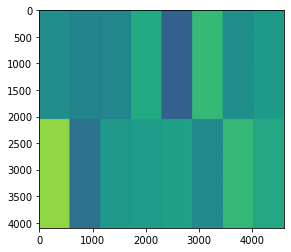

In [10]:
arr = test.image.array
plt.imshow(arr)